In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rcParams

In [2]:
df = pd.read_excel('sensor_comparision.xlsx')

In [3]:
df['Measure'] = df['Measure'].replace({'Dropcasting CBM':'DAP BaCBM2'})
df['Measure'] = df['Measure'].replace({'SAM + CBM':'SAM-BaCBM2'})

In [4]:
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df.iloc[:,1:]), columns=df.iloc[:,1:].columns)
df_normalized['Sample'] = df['Measure']
df_normalized['std'] = -1.01*df_normalized['std']
categories = ['Linearidade','\nPrecisão','Sensibilidade']

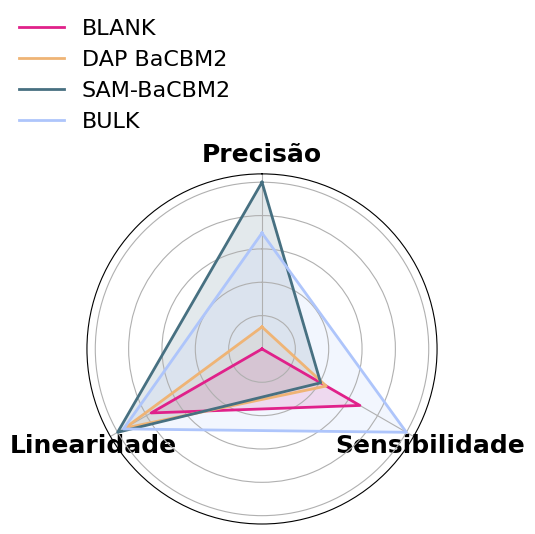

In [5]:
# Data
data = {
    "BLANK": [12.4-12.40, 0.76, 6.46],
    "DAP BaCBM2": [12.4-10.88, 0.94, 4.24],
    "SAM-BaCBM2": [12.4-0.88, 0.99, 3.87],
    "BULK": [12.4-4.39,0.95,9.53]
}

measures = ["Precisão", "Linearidade", "Sensibilidade"]
categories_plot = list(df_normalized.columns[:-1])

num_vars = len(categories_plot)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the circle

# Normalize the data for better visualization
max_values = np.max([list(values) for values in data.values()], axis=0)
data_normalized = {key: [v / m for v, m in zip(values, max_values)] for key, values in data.items()}

color = ['#E0218A','#EFB475','#477081','#AEC5FB']

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={"polar": True})
c = 0
for system, values in data_normalized.items():
    values += values[:1]  # Close the triangle
    ax.plot(angles, values, label=system, marker="", color = color[c] ,linewidth =2)
    ax.fill(angles, values, alpha=0.15, color = color[c])
    c +=1

# Add measure labels to the plot
ax.set_theta_offset(np.pi/2)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(measures,fontsize=18,fontweight='bold')
ax.grid(True)

# ax.set_ylim(-1,1)

plt.legend(fontsize=16, loc='upper left', bbox_to_anchor=(-0.25,1.5),framealpha=0)
plt.tight_layout()

# Add legend

# Title and show
plt.savefig('comparative.png', dpi = 400, transparent = True)
